# Data Cleaning

In [900]:
import pandas as pd
import numpy as np

In [901]:
df=pd.read_csv('spam_or_ham.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [902]:
#figure out the nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [903]:
#neither these unnamed feature doesnt indicate anything, nor they have sufficient value
#we can drop these feature
df=df.iloc[:, :2]
df.sample(5)

,v1,v2
5383,ham,Good day to You too.Pray for me.Remove the tee...
824,ham,Have a good evening! Ttyl
5386,ham,I'm at work. Please call
3111,ham,Just haven't decided where yet eh ?
4266,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...


In [904]:
#this shows our datasets is free from null value
df.isnull().sum().sum()

0

In [905]:
#lets check duplicate in the message
df.duplicated().sum()

403

In [906]:
df.drop_duplicates(keep='first', inplace=True)

In [907]:
df.shape

(5169, 2)

# EDA 

<Axes: xlabel='v1', ylabel='count'>

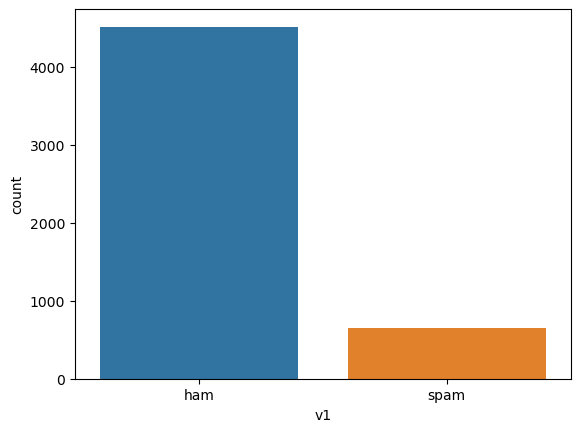

In [908]:
#lets analize the total number of spam and ham messages
import seaborn as sns
sns.countplot(x=df['v1'])

In [909]:
#so we can see that there are minority of spam and majority of ham message
#at this point we cant conclude anything else

In [910]:
import matplotlib.pyplot as plt
p=df['v1'].value_counts()
p=p/len(df)
p

ham     0.87367
spam    0.12633
Name: v1, dtype: float64

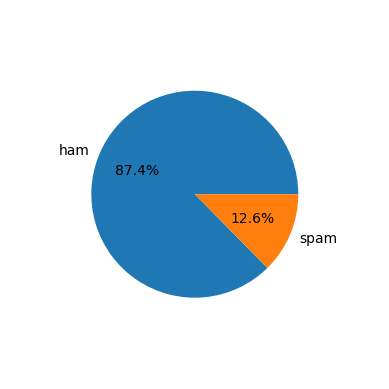

In [911]:
plt.pie(p.values, labels=p.index, autopct='%0.1f%%',radius=0.7)
plt.show()

In [912]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [913]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [914]:
df.columns=['target', 'text']
df.sample()

,target,text
1510,ham,"Pete,is this your phone still? Its Jenny from ..."


In [915]:
df['num_characters']=df['text'].apply(len)
df.sample(3)

,target,text,num_characters
4113,ham,Where are you ? What do you do ? How can you s...,154
4501,ham,Wot is u up 2 then bitch?,25
4054,ham,When is school starting. Where will you stay. ...,180


In [916]:
df['num_words']=df['text'].apply(lambda x: len(word_tokenize(x)))
df.sample(3)

,target,text,num_characters,num_words
2359,spam,Spook up your mob with a Halloween collection ...,149,29
5062,ham,Ok i also wan 2 watch e 9 pm show...,36,11
477,ham,Tension ah?what machi?any problem?,34,9


In [917]:
df['num_sentences']=df['text'].apply(lambda x: len(sent_tokenize(x)))

In [918]:
df.sample(3)

,target,text,num_characters,num_words,num_sentences
3332,spam,You are being contacted by our dating service ...,140,28,3
463,ham,"Sorry, I'll call later ok bye",29,8,1
3901,ham,"Right on brah, see you later",28,7,1


In [919]:
df.describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.454246,1.948152
std,58.175349,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [920]:
#we can conclude something from this
#mean and standard values doesnt tend to give us too much information
#it seems like on an average 10 words make a sentence, but does the trend differ in the spam or ham catrgory??
#the minimum number of num_character is 2
#its most probable that small message like these have the highest possibility of ham like good morning messages or others
#to achieve 75%, it requires only 2 sentences and 26 words
#but it substancially increases when the 25% quartile
#its pretty sure, most of the ham message aren't this long

In [921]:
#lets do the initial comparision based on the category of target
df[df['target']=='ham'].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.120903,1.799601
std,56.357463,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [922]:
df[df['target']=='spam'].describe()
#we can see that the standard deviation of spam message have smaller deviation as compared to ham message
#also ham message are tend to be smaller in size, but in some occasion it has big size as well
#the restricted size(not too big or small) generally refer that the spam message are generally designed for marketing purposes

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [923]:
#it seems that there would be some difference in the distriubtion of words and characters
#difference in the sentence wont make much difference(won't help us draw comclusion) but we will check it aswell

<Axes: xlabel='num_characters', ylabel='Count'>

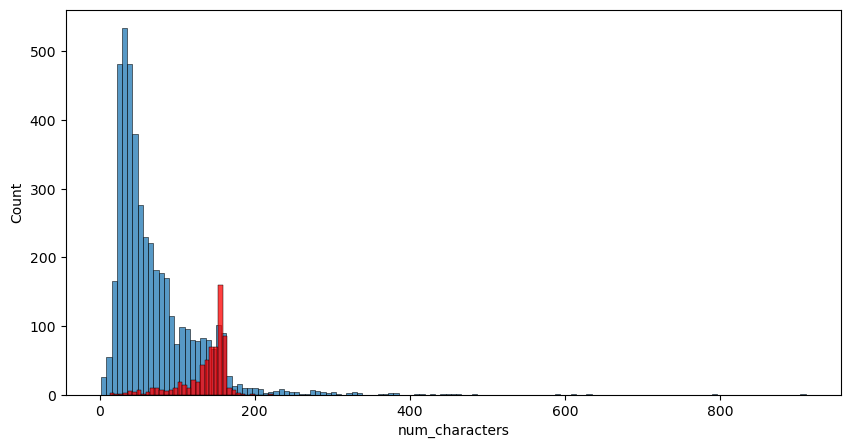

In [924]:
#lets compare the distribution of spam and ham characters
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']=='ham']['num_characters'])
sns.histplot(df[df['target']=='spam']['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

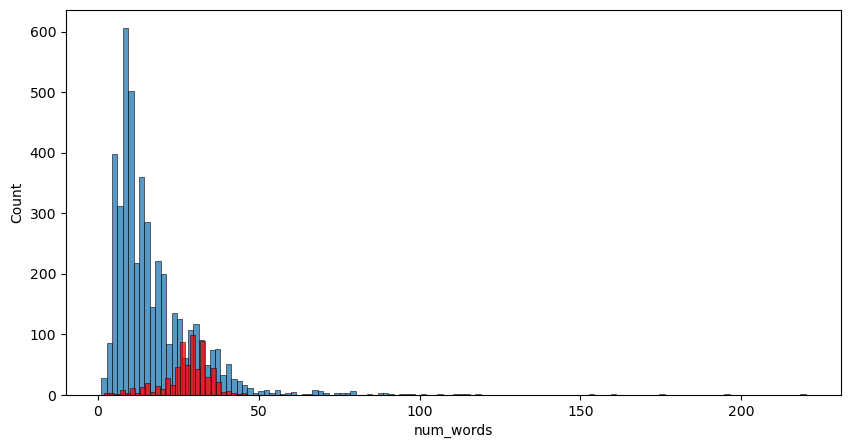

In [925]:
#lets compare the distribution of spam and ham words
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']=='ham']['num_words'])
sns.histplot(df[df['target']=='spam']['num_words'], color='red')

C:\Users\acer\AppData\Local\Temp\ipykernel_3236\51861126.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']=='ham']['num_characters'], ax=ax1)
C:\Users\acer\AppData\Local\Temp\ipykernel_3236\51861126.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target']=='spam']['n

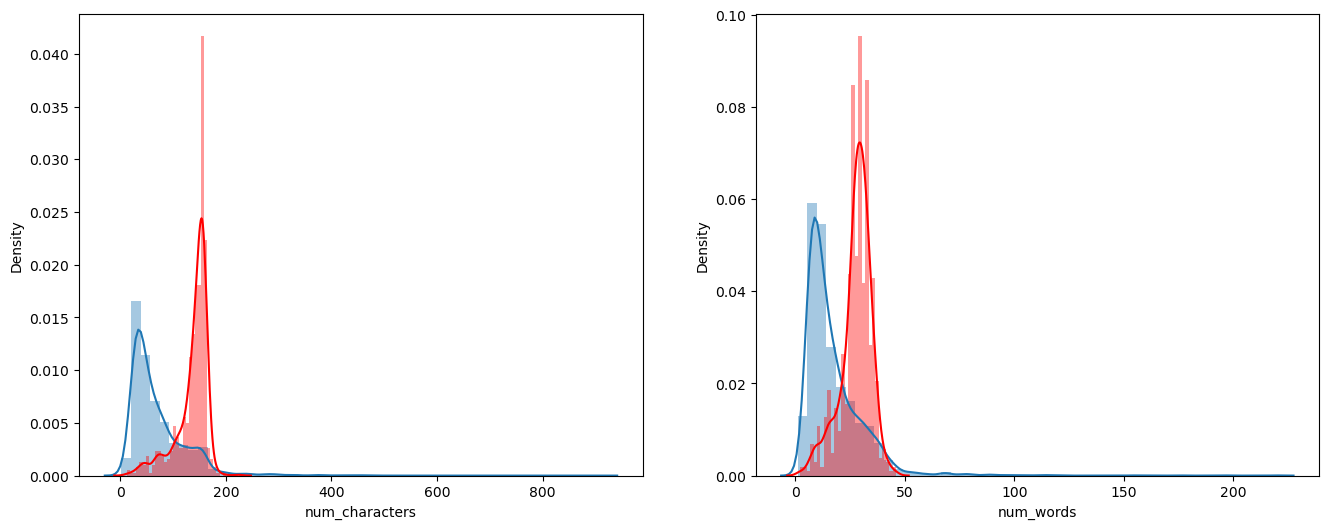

In [926]:
figure, (ax1, ax2)=plt.subplots(ncols=2, figsize=(16,6))
sns.distplot(df[df['target']=='ham']['num_characters'], ax=ax1)
sns.distplot(df[df['target']=='spam']['num_characters'], color='red', ax=ax1)
sns.distplot(df[df['target']=='ham']['num_words'], ax=ax2)
sns.distplot(df[df['target']=='spam']['num_words'], color='red', ax=ax2)
plt.show()

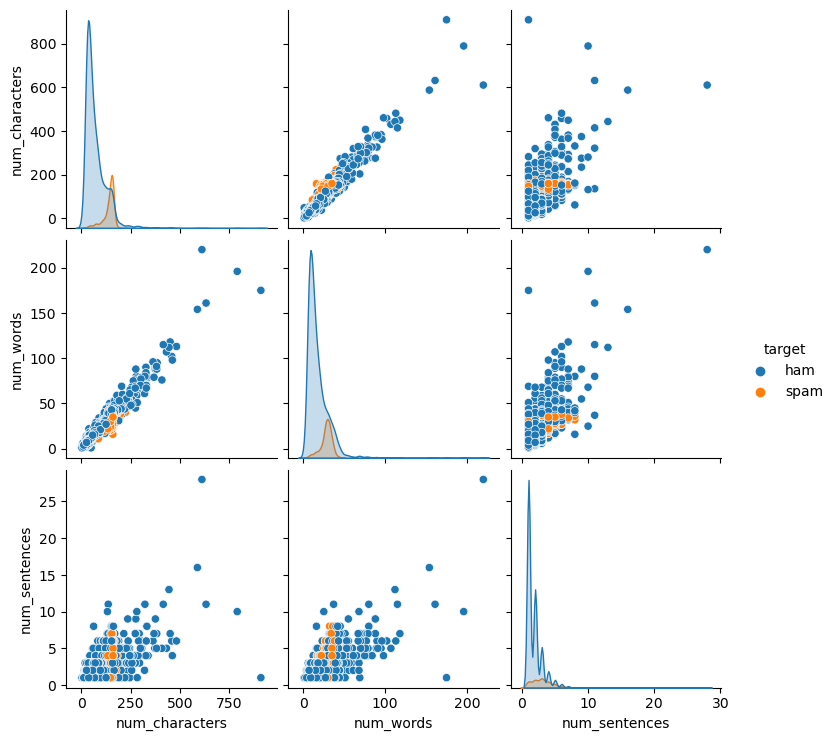

In [927]:
sns.pairplot(df, hue='target')

In [928]:
#dont mind about the num sentence distribution because its not a continous value
df[df['target']=='ham']['num_sentences'].value_counts().sort_index(ascending=False)

28       1
16       1
13       1
11       4
10       3
9        3
8        5
7       17
6       44
5       93
4      197
3      485
2     1176
1     2486
Name: num_sentences, dtype: int64

In [929]:
df[df['target']=='spam']['num_sentences'].value_counts().sort_index(ascending=False)
#we can notice one thing looking at the value count of sentence than the value_count of sentence at 4,5,6 and 7 is comparable eventhough the number of ham is much more than spam
#also very less sentence above 8 have value_count(combined) close to 10

8      3
7     12
6     21
5     65
4    110
3    178
2    146
1    118
Name: num_sentences, dtype: int64

In [930]:
#just to get a better understanding we can calculate the percentage of the occurance of the value_counts in their respective category
df[df['target']=='ham']['num_sentences'].value_counts().sort_index(ascending=False)/len(df[df['target']=='ham'])

28    0.000221
16    0.000221
13    0.000221
11    0.000886
10    0.000664
9     0.000664
8     0.001107
7     0.003764
6     0.009743
5     0.020593
4     0.043623
3     0.107396
2     0.260407
1     0.550487
Name: num_sentences, dtype: float64

In [931]:
df[df['target']=='spam']['num_sentences'].value_counts().sort_index(ascending=False)/len(df[df['target']=='spam'])

8    0.004594
7    0.018377
6    0.032159
5    0.099541
4    0.168453
3    0.272588
2    0.223583
1    0.180704
Name: num_sentences, dtype: float64

In [932]:
#so we have got a clear idea that when sentences are-3,4,5,6 and 7, the possibility of spam message is most likely
#also when the sentences are 1 and 2, the probability of ham message is much higher
#also when the number exceed higher than 7, we cant really conclude anything since data is less available
#it might also be possible that the data we have doesnt have much information about the spam messgae above 8 thats why there is no message like that
#so we can simply make a new columns which encode sentence below 3 as 1, above and equal to 3 as 2 and above 7 as 3

In [933]:
def custom_encode(x):
    if x<3:
        return 1
    elif x<8:
        return 2
    else:
        return 3

In [934]:
df['sent_encode']=dff['num_sentences'].apply(custom_encode)
df.sample(3)

,target,text,num_characters,num_words,num_sentences,sent_encode
1926,ham,Dont give a monkeys wot they think and i certa...,135,33,3,2
744,ham,Men like shorter ladies. Gaze up into his eyes.,47,11,2,1
3856,ham,No! But we found a diff farm shop to buy some ...,85,24,3,2


In [935]:
for i in range(10):
    print(df['text'][i], df['target'][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... ham
Ok lar... Joking wif u oni... ham
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's spam
U dun say so early hor... U c already then say... ham
Nah I don't think he goes to usf, he lives around here though ham
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv spam
Even my brother is not like to speak with me. They treat me like aids patent. ham
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune ham
WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. spam
Had yo

In [936]:
#we have pretty much done the Exploratory Data Analysis
#we can proceed to text preprocessing

# Text Preprocessing

In [937]:
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
ps = PorterStemmer()

In [938]:
def perform_preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #we have to get rid of alpha numerical columns
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [939]:
df['text']=df['text'].apply(lambda x:perform_preprocessing(x))

In [940]:
df['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [941]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [942]:
#lets do more analysis
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [943]:
spam_wc_ham=wc.generate(df[df['target']=='ham']['text'].str.cat(sep=" "))

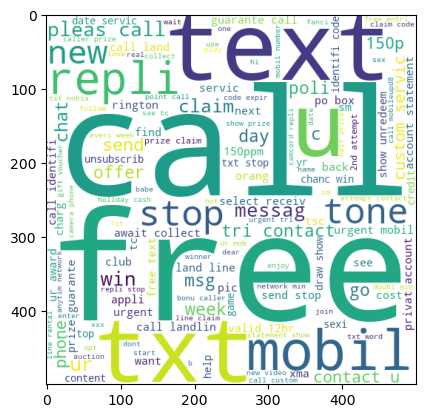

In [944]:
plt.imshow(spam_wc)

In [945]:
spam_wc_spam=wc.generate(df[df['target']=='spam']['text'].str.cat(sep=" "))

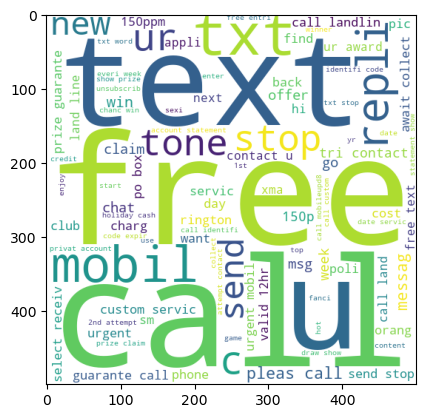

In [946]:
plt.imshow(spam_wc_spam)

In [947]:
#lets find out the 30 most frequent words out of these
spam_corpus = []
for msg in df[df['target'] == 'spam']['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(spam_corpus[0:10])
print(len(spam_corpus))

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']
9941


In [948]:
#counter find the value_count of the word in the corpus
from collections import Counter
word_counts=Counter(spam_corpus)

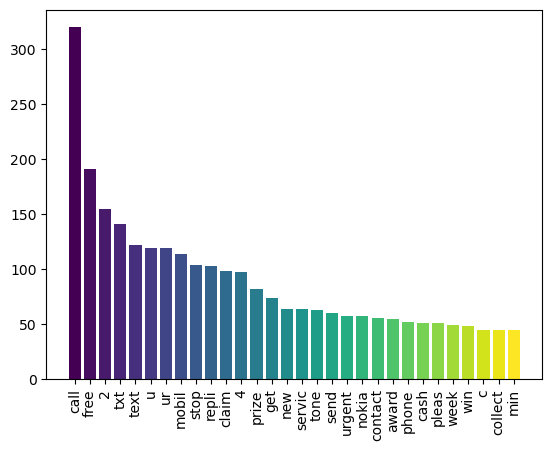

In [949]:
sorted_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
top_30 = list(sorted_counts.items())[:30]
top_30_words, top_30_counts = zip(*top_30)
df_top_30 = pd.DataFrame({'Word': top_30_words, 'Count': top_30_counts})
plt.bar(df_top_30['Word'], df_top_30['Count'],color=plt.cm.viridis(np.linspace(0, 1, len(df_top_30))))
plt.xticks(rotation='vertical')
plt.show()

In [950]:
ham_corpus = []
for msg in df[df['target'] == 'ham']['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [951]:
word_counts=Counter(ham_corpus)

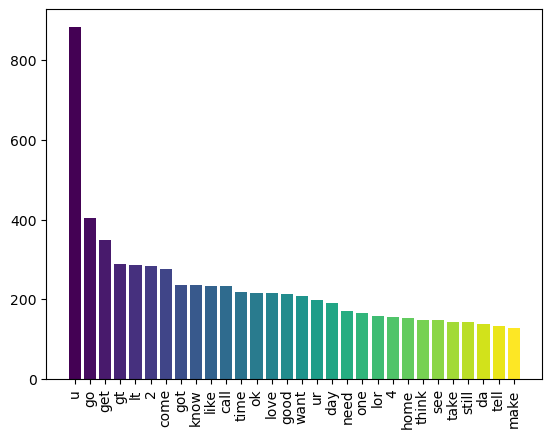

In [952]:
sorted_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
top_30 = list(sorted_counts.items())[:30]
top_30_words, top_30_counts = zip(*top_30)
df_top_30 = pd.DataFrame({'Word': top_30_words, 'Count': top_30_counts})
plt.bar(df_top_30['Word'], df_top_30['Count'],color=plt.cm.viridis(np.linspace(0, 1, len(df_top_30))))
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [953]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [954]:

# Use fit_transform to convert the data into a bag-of-words representation
X = cv.fit_transform(df['text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [955]:
X.shape

(5169, 6677)

In [956]:
def func(x):
    if x=='ham':
        return 0
    else:
        return 1

In [957]:
y=df['target'].apply(func)
y.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [958]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((4135, 6677), (4135,))

In [959]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, make_scorer
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [960]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)

mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)

bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)

#as expected we wont get good result for classification using gaussian naive bayes
accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3)

(0.8665377176015474, 0.9729206963249516, 0.9661508704061895)

In [961]:
precision_score(y_test, y_pred1),precision_score(y_test, y_pred2), precision_score(y_test, y_pred3)

(0.5142857142857142, 0.8874172185430463, 0.9661016949152542)

<Axes: >

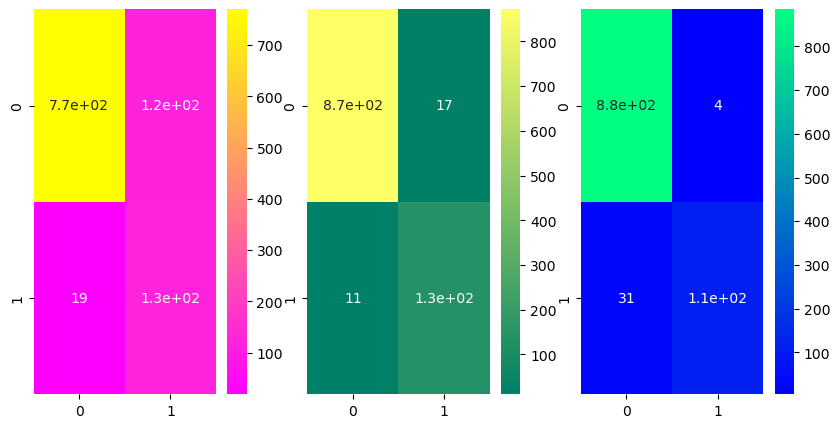

In [962]:
figure, ax=plt.subplots(1,3, figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred1), ax=ax[0], annot=True, cmap='spring')
sns.heatmap(confusion_matrix(y_test, y_pred2), ax=ax[1], annot=True, cmap='summer')
sns.heatmap(confusion_matrix(y_test, y_pred3), ax=ax[2], annot=True, cmap='winter')

In [963]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [964]:
y=df['target'].apply(func)
y.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [965]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((4135, 6677), (4135,))

In [966]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [967]:
gnb.fit(X_train, y_train)
y_pred1=gnb.predict(X_test)

mnb.fit(X_train, y_train)
y_pred2=mnb.predict(X_test)

bnb.fit(X_train, y_train)
y_pred3=bnb.predict(X_test)

#as expected we wont get good result for classification using gaussian naive bayes
accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3)

(0.8617021276595744, 0.9613152804642167, 0.9661508704061895)

In [968]:
precision_score(y_test, y_pred1),precision_score(y_test, y_pred2), precision_score(y_test, y_pred3)
#our precision score improved drastically

(0.5041666666666667, 0.9906542056074766, 0.9661016949152542)

<Axes: >

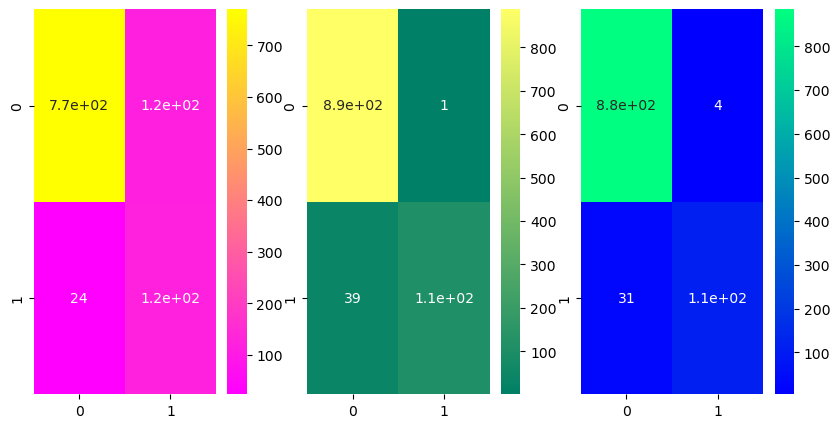

In [969]:
figure, ax=plt.subplots(1,3, figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred1), ax=ax[0], annot=True, cmap='spring')
sns.heatmap(confusion_matrix(y_test, y_pred2), ax=ax[1], annot=True, cmap='summer')
sns.heatmap(confusion_matrix(y_test, y_pred3), ax=ax[2], annot=True, cmap='winter')

In [970]:
#so we can see that using multinomial naive bayes gives the most accuracy as well as the precison score
#lets implement it using the different number of 'max_features' in the tfidf model
max_features=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,len(df)]
score_list=[]
#score list store the max_features, accuracy_score and precision_score
for i in max_features:
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf=TfidfVectorizer(max_features=i)
    X=tfidf.fit_transform(df['text']).toarray()
    y=df['target'].apply(func)
    mnb_i=MultinomialNB()
    j=np.mean(cross_val_score(mnb_i, X, y, cv=5, scoring='accuracy'))
    precision_scorer = make_scorer(precision_score)
    k=np.mean(cross_val_score(mnb_i, X, y, cv=5,scoring=precision_scorer))
    score_list.append([i, j, k])
    
score_list
    

[[500, 0.9705932468388443, 0.9584906650721674],
 [1000, 0.9762034673941742, 0.9820128883808129],
 [1500, 0.9762032801496459, 0.9873681586725066],
 [2000, 0.9748498766994782, 0.9891994959832535],
 [2500, 0.9744626550150638, 0.9926605504587156],
 [3000, 0.9721404483757473, 0.9922330097087378],
 [3500, 0.9703998232411652, 0.9941176470588236],
 [4000, 0.9680779910909054, 0.9958333333333333],
 [4500, 0.9661428188914749, 0.9956043956043956],
 [5000, 0.9642078339365728, 0.9954022988505746],
 [5169, 0.9640142230943656, 0.9953488372093023]]

In [971]:
#lets sort the list based on the precision score
df_algos=pd.DataFrame(score_list, columns=['i','accuracy_score','precision_score'])
df_algos.sort_values(by=['precision_score'], ascending=False)

,i,accuracy_score,precision_score
7,4000,0.968078,0.995833
8,4500,0.966143,0.995604
9,5000,0.964208,0.995402
10,5169,0.964014,0.995349
6,3500,0.970400,0.994118
4,2500,0.974463,0.992661
5,3000,0.972140,0.992233
3,2000,0.974850,0.989199
2,1500,0.976203,0.987368
1,1000,0.976203,0.982013


In [972]:
#but we have seen that we have only used the text column for finding the most suitable algorithm
#we have missed columns like num_characters, num_words and sent_encode

In [973]:
#lets include it and see what could be the results
#we would do the same thing above, all we have to do is stack the X with the rest of the columns

In [974]:
df['num_characters'].values.reshape(-1,1)
#we have to reshape before we implement hstack

array([[111],
       [ 29],
       [155],
       ...,
       [ 57],
       [125],
       [ 26]], dtype=int64)

In [975]:
p=np.hstack((df['num_characters'].values.reshape(-1,1),df['num_words'].values.reshape(-1,1),df['sent_encode'].values.reshape(-1,1)))
p

array([[111,  24,   1],
       [ 29,   8,   1],
       [155,  37,   1],
       ...,
       [ 57,  15,   1],
       [125,  27,   1],
       [ 26,   7,   1]], dtype=int64)

In [976]:
max_features=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,len(df)]
score_list=[]
#score list store the max_features, accuracy_score and precision_score
for i in max_features:
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf=TfidfVectorizer(max_features=i)
    X=tfidf.fit_transform(df['text']).toarray()
    X=np.hstack((X,p))
    y=df['target'].apply(func)
    mnb_i=MultinomialNB()
    j=np.mean(cross_val_score(mnb_i, X, y, cv=5, scoring='accuracy'))
    precision_scorer = make_scorer(precision_score)
    k=np.mean(cross_val_score(mnb_i, X, y, cv=5,scoring=precision_scorer))
    score_list.append([i, j, k])
    
score_list

[[500, 0.9744632167486487, 0.9567278152207285],
 [1000, 0.9758162457097598, 0.9716797564274628],
 [1500, 0.9719473992671249, 0.9831759916224941],
 [2000, 0.9680778038463771, 0.9919419037283932],
 [2500, 0.9611132436182384, 0.9954545454545455],
 [3000, 0.9520199003484621, 0.9946666666666667],
 [3500, 0.937317834479582, 0.9968253968253968],
 [4000, 0.922421783279438, 0.9960000000000001],
 [4500, 0.9071390721284647, 0.9947368421052631],
 [5000, 0.8959178820396921, 1.0],
 [5169, 0.8910811686305496, 1.0]]

In [977]:
#lets sort the list based on the precision score
df_algos=pd.DataFrame(score_list, columns=['i','accuracy_score','precision_score'])
df_algos.sort_values(by=['precision_score'], ascending=False)

,i,accuracy_score,precision_score
9,5000,0.895918,1.000000
10,5169,0.891081,1.000000
6,3500,0.937318,0.996825
7,4000,0.922422,0.996000
4,2500,0.961113,0.995455
8,4500,0.907139,0.994737
5,3000,0.952020,0.994667
3,2000,0.968078,0.991942
2,1500,0.971947,0.983176
1,1000,0.975816,0.971680


In [984]:
#we can see that the precision score increased but the accuracy_score decreased drastically
#this signifies that the best algorithm we can choose is by using tfidf for data preparation, multinomial NB as algorithm and max-feature as 4000 without the need of extra information other than text

In [988]:
#lets implement the best algorithm
tfidf_best=TfidfVectorizer(max_features=4000)
X=tfidf_best.fit_transform(df['text']).toarray()

y=df['target'].apply(func)
mnb_best=MultinomialNB()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
mnb_best.fit(X_train, y_train)
y_pred=mnb_best.predict(X_test)
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.9700193423597679, 0.9913793103448276)

In [989]:
import pickle
pickle.dump(tfidf_best, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb_best, open('algorithm.pkl', 'wb'))